In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("baru.csv", index_col="Item_Identifier")
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
DRC01,5.920,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
FDN15,17.500,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
FDX07,19.200,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
NCD19,8.930,0,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,0,0.056783,13,214.5218,1,1,0,2,1,2778.3834
FDS36,8.380,1,0.046982,0,108.1570,7,5,1,1,1,549.2850
NCJ29,10.600,0,0.035186,8,85.1224,6,6,2,1,1,1193.1136


In [4]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,3.790684,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,2.730322,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,4.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,6.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,8.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

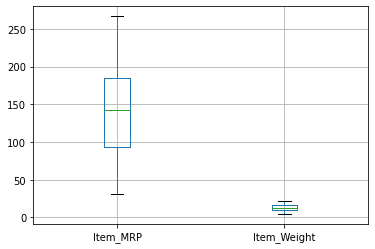

In [5]:
data.boxplot(['Item_MRP', 'Item_Weight'])

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
scaler.fit(data[['Item_MRP']])
data['Item_MRP_Scalled'] = scaler.transform(data[['Item_MRP']])

In [9]:
data['Item_MRP_Scalled'].describe()

count    8523.000000
mean        0.465635
std         0.264327
min         0.000000
25%         0.265437
50%         0.474209
75%         0.655156
max         1.000000
Name: Item_MRP_Scalled, dtype: float64

<AxesSubplot:>

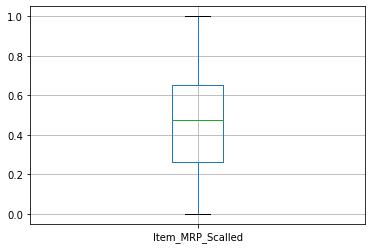

In [10]:
data.boxplot(['Item_MRP_Scalled'])

In [11]:
scaler.fit(data[['Item_Weight']])
data['Item_Weight_Scalled'] = scaler.transform(data[['Item_Weight']])

In [12]:
data['Item_Weight_Scalled'].describe()

count    8523.000000
mean        0.494352
std         0.251630
min         0.000000
25%         0.283120
50%         0.494352
75%         0.681453
max         1.000000
Name: Item_Weight_Scalled, dtype: float64

<AxesSubplot:>

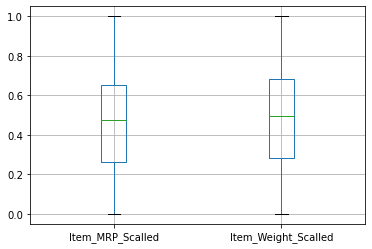

In [13]:
data.boxplot(['Item_MRP_Scalled', 'Item_Weight_Scalled'])

In [14]:
# nilai min == 0
# nilai max == 200

awal = np.array([[25, 50, 150, 200, 75]])

In [15]:
# nilai min baru == 0
# nilai max baru == 1

(awal-0)*(1-0)/(200-0)+0

array([[0.125, 0.25 , 0.75 , 1.   , 0.375]])

## Feature Selection
Tujuannya adalah untuk memilih fitur yang "berpengaruh" pada <i>dataset</i>

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
bmsx = np.array([data["Item_Weight"],
                data["Item_Fat_Content"],
                data["Item_Visibility"],
                data['Item_MRP'],
                data["Outlet_Size"]])
bmsx.shape

(5, 8523)

In [18]:
bmsx

array([[9.30000000e+00, 5.92000000e+00, 1.75000000e+01, ...,
        1.06000000e+01, 7.21000000e+00, 1.48000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.60473010e-02, 1.92782160e-02, 1.67600750e-02, ...,
        3.51862710e-02, 1.45220646e-01, 4.48782800e-02],
       [2.49809200e+02, 4.82692000e+01, 1.41618000e+02, ...,
        8.51224000e+01, 1.03133200e+02, 7.54670000e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00]])

In [19]:
bmsxt=bmsx.transpose()
bmsxt.shape

(8523, 5)

In [20]:
bms_std=StandardScaler().fit_transform(bmsxt)
bms_std

array([[-0.84187169, -0.73814723, -0.97073217,  1.74745381, -0.28458121],
       [-1.64170589,  1.35474328, -0.90811123, -1.48902325, -0.28458121],
       [ 1.09855449, -0.73814723, -0.95691733,  0.01004021, -0.28458121],
       ...,
       [-0.53424315, -0.73814723, -0.59978449, -0.89720755,  1.38127431],
       [-1.33644372,  1.35474328,  1.53287976, -0.60797692, -0.28458121],
       [ 0.45963367, -0.73814723, -0.41193591, -1.05226104,  1.38127431]])

In [21]:
pcafs=PCA(n_components=0.70,whiten=True)
bmsfs_pca=pcafs.fit_transform(bms_std)

In [22]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfs_pca.shape[1])

Original number of features: 5
Reduced numer of features: 4


In [23]:
datafs_pca=pd.DataFrame(bmsfs_pca, columns=["PC1","PC2","PC3","PC4"])
datafs_pca

,PC1,PC2,PC3,PC4
0,-0.905339,0.532946,0.467277,-2.012024
1,0.189393,-2.464418,0.546322,-0.041835
2,-1.323776,0.658592,-0.378170,0.422434
3,-0.800139,0.934151,1.459296,0.865834
4,-1.932469,-2.094947,-0.119546,0.026075
...,...,...,...,...
8518,-1.126692,-0.601088,1.016007,-1.632324
8519,0.397127,-1.397350,0.942667,-0.083106
8520,0.171736,-0.471014,-1.595302,-0.433513
8521,1.708602,-1.411307,0.819933,0.160984


## <i>Feature Extraction</i>
Tujuannya adalah menggabungkan/mengelompokkan feature menjadi beberapa feature saja.

In [24]:
from sklearn import decomposition

In [25]:
pcafe=decomposition.PCA(n_components=3)
bmsfe_pca=pcafe.fit_transform(bms_std)

In [26]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfe_pca.shape[1])

Original number of features: 5
Reduced numer of features: 3


In [27]:
datafe_pca=pd.DataFrame(bmsfe_pca, columns=["PC1","PC2", "PC3"])
datafe_pca

,PC1,PC2,PC3
0,-0.944736,0.539700,0.467727
1,0.197634,-2.495648,0.546847
2,-1.381382,0.666938,-0.378534
3,-0.834957,0.945989,1.460699
4,-2.016563,-2.121495,-0.119661
...,...,...,...
8518,-1.175721,-0.608705,1.016983
8519,0.414409,-1.415057,0.943573
8520,0.179209,-0.476983,-1.596835
8521,1.782954,-1.429192,0.820721
